# Superpixels

This notebook expands on the idea of splitting the image in superpixels and afterwards classifying each superpixel depending on its texture.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage.segmentation import mark_boundaries
from skimage import io

## Image
First, I'm just loading a random image (this is a concept test, so no cancer on this one)

In [3]:
image = img_as_float(io.imread('IMG_3721.jpg'))

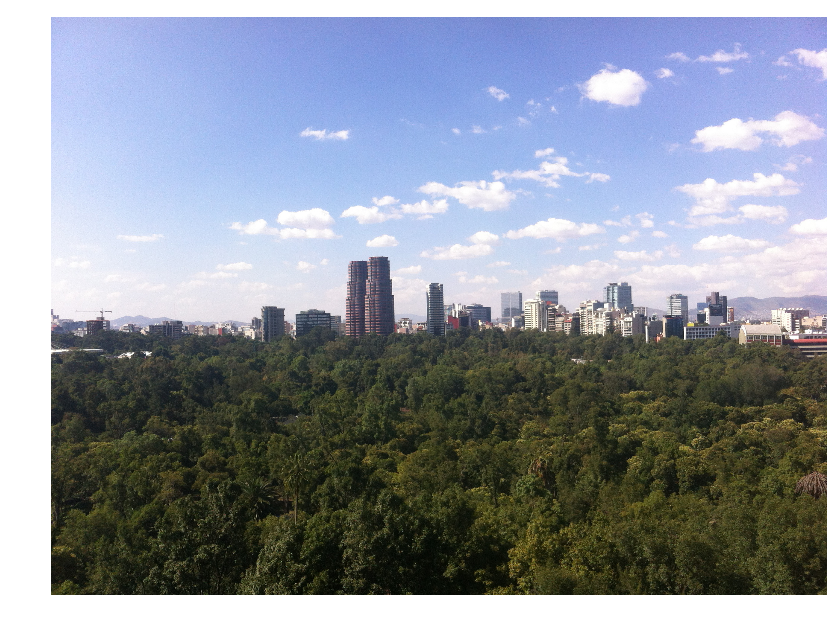

In [4]:
figure(figsize=(10,10))
imshow(image)
axis('off');

## Second
Now, I'm splitting the image in a maximum of 200 super pixels

''

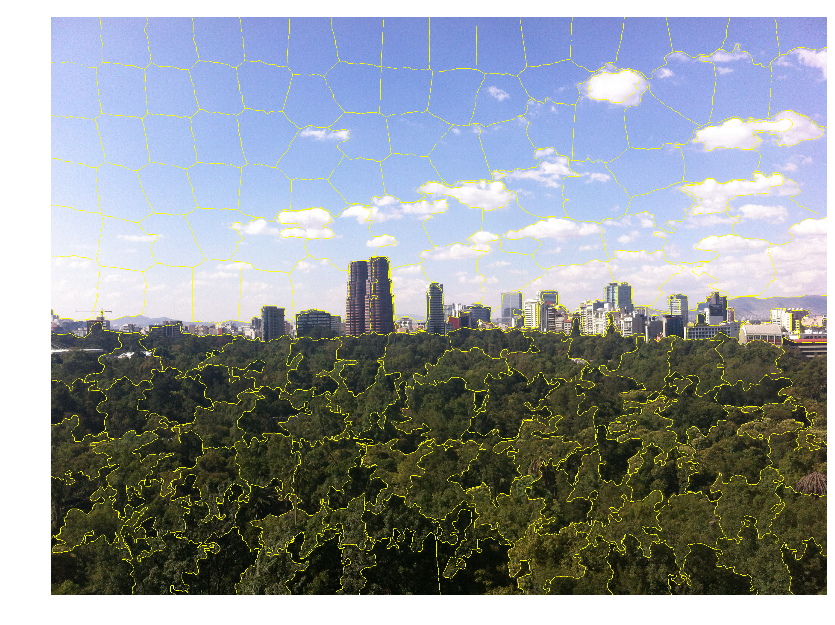

In [5]:
numSegments = 200
segments = slic(image, n_segments = numSegments, sigma = 5)
figure(figsize=(10,10))
imshow(mark_boundaries(image, segments))
axis('off')
;

Basically, each superpixel is a region of pixels which are similar. The `segments` are a matrix of pixel labels, where `segments[i,j] = N` means that pixel `i,j` belongs in superpixel N.

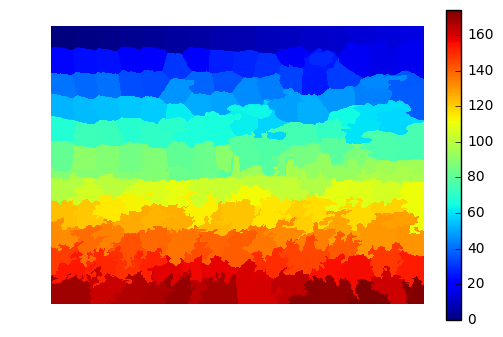

In [6]:
imshow(segments)
axis('off')
colorbar();

## Finally
So we can cut out superpixels:

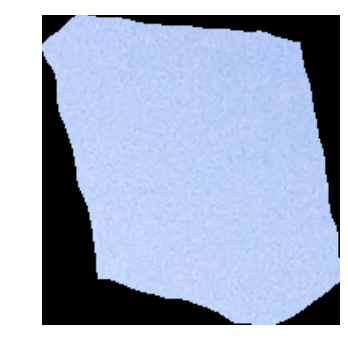

In [11]:
mask = segments==40
masked = image.copy()
for i in range(3):
    masked[:,:,i] = masked[:,:,i] * mask
x,y = np.where(mask)
imshow(masked[x.min():x.max(), y.min():y.max(), :])
axis('off');

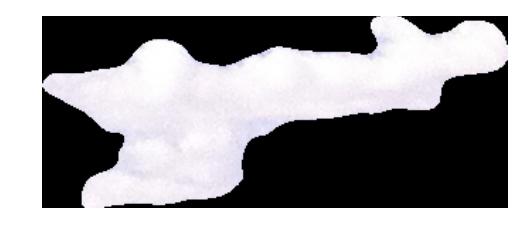

In [12]:
mask = segments==60
masked = image.copy()
for i in range(3):
    masked[:,:,i] = masked[:,:,i] * mask
x,y = np.where(mask)
imshow(masked[x.min():x.max(), y.min():y.max(), :])
axis('off');

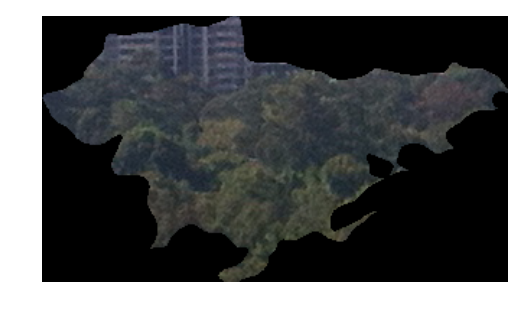

In [13]:
mask = segments==100
masked = image.copy()
for i in range(3):
    masked[:,:,i] = masked[:,:,i] * mask
x,y = np.where(mask)
imshow(masked[x.min():x.max(), y.min():y.max(), :])
axis('off');

We could now classify each super pixel as Zone 1, zone 2, zone3.